畳み込みニューラルネットワーク (CNN) の画像認識における識別精度を向上させる方法は, 主に以下の3つに分類されます. 

**1. データ**

* **学習データの量と質を向上させる**: 
    * より多くの画像データで学習させることで, ネットワークはより多くの特徴を学ぶことができます. 
    * 画像データの質を高めるために, データのノイズを除去したり, 歪みや欠損を補正したりするなどのデータ加工を行うことも有効です. 
    * データ拡張 (Data Augmentation)と呼ばれる手法を用いて, 学習データのバリエーションを増やすことも有効です. 具体的には, 画像の回転, 反転, 拡大縮小, 色調変換などの操作を行うことができます. 
* **データセットの偏りを解消する**: 
    * 学習データセットに偏りがあると, 特定のカテゴリの画像のみを認識しやすくなり, 他のカテゴリの画像の認識精度が低くなる可能性があります. 
    * データセットの偏りを解消するために, 過剰サンプリングやアンダーサンプリングなどの手法を用いることができます. 具体的には, 認識精度が低いカテゴリの画像を増やしたり, 認識精度が高いカテゴリの画像を減らしたりすることで, データセットのバランスを調整することができます. 

**2. モデル**

* **ネットワークの構造を改善する**: 
    * より深い層構造のネットワークや, より複雑な結合構造のネットワークを用いることで, ネットワークの表現力を高めることができます. 
    * 近年では, ResNetやInceptionNetなどの新しいネットワークアーキテクチャが提案されており, 従来のネットワークよりも高い精度を達成することが可能になっています. 
* **活性化関数を変更する**: 
    * ReLUやtanhなどの活性化関数を, Leaky ReLUやPReLUなどの改良型活性化関数に変更することで, ネットワークの学習効率を向上させることができます. 
    * 近年では, SwishやMishなどの新しい活性化関数が提案されており, 従来の活性化関数よりも高い精度を達成することが可能になっています. 
* **正規化手法を用いる**: 
    * L1正規化やL2正規化などの正規化手法を用いることで, ネットワークの過学習を抑えることができます. 
    * 過学習を抑えることで, ネットワークの汎化性能を向上させることができます. 
    * Batch NormalizationやDropoutなどの新しい正規化手法が提案されており, 従来の正規化手法よりも効果的な場合があります. 

**3. 学習**

* **最適化アルゴリズムを変更する**: 
    * SGDやAdamなどの最適化アルゴリズムを, RMSpropやNadamなどの改良型最適化アルゴリズムに変更することで, ネットワークの学習効率を向上させることができます. 
    * 近年では, AdaGradやAdaDeltaなどの新しい最適化アルゴリズムが提案されており, 従来の最適化アルゴリズムよりも高い精度を達成することが可能になっています. 
* **学習率を調整する**: 
    * 学習率を適切に調整することで, ネットワークの学習効率を向上させることができます. 
    * 学習率が大きすぎると, ネットワークが不安定になり, 学習がうまく進まなくなる可能性があります. 
    * 学習率が小さすぎると, ネットワークの学習が遅くなります. 
    * 近年では, Learning Rate Schedulerと呼ばれる手法を用いて, 学習率を自動的に調整する方法が提案されています. 
* **バッチサイズを変更する**: 
    * バッチサイズを適切に調整することで, ネットワークの学習効率を向上させることができます. 
    * バッチサイズが大きすぎると, メモリ不足などの問題が発生する可能性があります. 
    * バッチサイズが小さすぎると, GPUなどのハードウェア資源を有効活用できなくなります. 

**その他**

* **転移学習 (Transfer Learning)** を用いる**: 
    * ImageNetなどの大規模なデータセットで学習済みのモデルを転移学習として利用することで, 学習時間を短縮し, 精度を向上させることができます. 
* **アンサンブル学習 (Ensemble Learning)** を用いる**: 
    * 複数のCNNモデルを学習させ, それぞれのモデルの予測結果を組み合わせることで, 精度を向上させることができます. 
* **ハードウェアを強化する**: 
    * より高性能なGPUやTPUなどのハードウェアを用いることで, 学習時間を短縮し, 精度を向上させることができます. 

これらの方法を組み合わせることで, CNNの画像認識における識別精度をより高めることができます. 

**参考情報**

* [畳み込みニューラルネットワーク (CNN) とは？仕組みや特徴を1から解説]([無効な URL を削除しました]

In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
     #[transforms.RandomHorizontalFlip(),
     #transforms.RandomCrop(32, padding=4),
     #transforms.ToTensor(),
     #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          #shuffle=True, num_workers=2)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
#testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         #shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


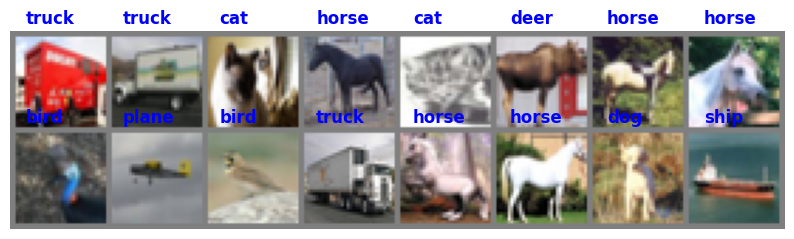

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# 画像の表示関数
def imshow(img, labels):
    img = img / 2 + 0.5  # 正規化を戻す
    npimg = img.numpy()
    plt.figure(figsize=(10, 6))  # 画像サイズを調整
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')  # 軸を非表示にする
    
    # ラベルの位置を計算して表示
    for i, label in enumerate(labels):
        x = (i % 8) * (npimg.shape[2] / 8) + 5  # ラベルのx位置
        y = (i // 8) * (npimg.shape[1] / 2) - 8  # ラベルのy位置（上部に配置）
        plt.text(x, y, classes[label], ha='left', va='top', color='blue', fontsize=12, weight='bold')

    plt.show()

# 適当な訓練セットの画像を取得
for data in trainloader:
    images, labels = data
    break  # デモ用に1つのバッチのみ処理

# 画像とラベルの表示
imshow(torchvision.utils.make_grid(images, nrow=8), labels)

In [5]:
import torch.nn as nn
import torch.nn.functional as F


#class Net(nn.Module):
    #def __init__(self):
        #super(Net, self).__init__()
        #self.conv1 = nn.Conv2d(3, 6, 5)
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        #self.fc1 = nn.Linear(16 * 5 * 5, 120)
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 10)

    #def forward(self, x):
        #x = self.pool(F.relu(self.conv1(x)))
        #x = self.pool(F.relu(self.conv2(x)))
        #x = x.view(-1, 16 * 5 * 5)
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc3(x)
        #return x


#net = Net()


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
from torch.optim.lr_scheduler import StepLR

# L1/L2正則化
l1_lambda = 0.01
l2_lambda = 0.001

# 最適化アルゴリズムの定義
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=l1_lambda + l2_lambda)

# 学習率スケジューラーの定義
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

In [15]:
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

best_loss = float('inf')
early_stop_count = 0

for epoch in range(100):  # エポック数分ループを回します

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # データセットのデータを [inputs, labels]の形で取得
        inputs, labels = data

        # パラメータの勾配をリセット
        optimizer.zero_grad()

        # 順伝搬＋逆伝搬＋パラメータ更新
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 統計情報の表示
        running_loss += loss.item()
        if i % 2000 == 1999:    # 2,000ミニバッチにつき1度表示
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            if running_loss < best_loss:
                best_loss = running_loss
                torch.save(net.state_dict(), 'best_model.pth')
            else:
                early_stop_count += 1
                if early_stop_count == 3:
                    print('Early stopping')
                    break
            running_loss = 0.0

    scheduler.step()

    if early_stop_count == 3:
        break

print('Finished Training')

[1,  2000] loss: 1.962
[2,  2000] loss: 1.730


In [75]:
from torch.optim.lr_scheduler import StepLR
import torch
from tqdm.notebook import tqdm

scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

best_loss = float('inf')
early_stop_count = 0

# エポック数分ループを回します
for epoch in tqdm(range(100), desc='Epoch Progress', leave=False):
    running_loss = 0.0
    # ミニバッチの進捗バーを作成
    batch_progress = tqdm(enumerate(trainloader, 0), total=len(trainloader), desc=f'Epoch {epoch+1}', leave=False)
    
    for i, data in batch_progress:
        # データセットのデータを [inputs, labels]の形で取得
        inputs, labels = data

        # パラメータの勾配をリセット
        optimizer.zero_grad()

        # 順伝搬＋逆伝搬＋パラメータ更新
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 統計情報の更新
        running_loss += loss.item()
        batch_progress.set_postfix({'loss': running_loss / (i + 1)})

    # エポックごとの損失をチェック
    epoch_loss = running_loss / len(trainloader)
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        torch.save(net.state_dict(), 'best_model.pth')
        print(f"Epoch {epoch+1}: New Best Model Saved with loss {best_loss:.3f}")
    else:
        early_stop_count += 1
        if early_stop_count == 3:
            print('Early stopping')
            break

    scheduler.step()

print('Finished Training')

Epoch Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 1: New Best Model Saved with loss 2.177


Epoch 2:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 2: New Best Model Saved with loss 1.643


Epoch 3:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 3: New Best Model Saved with loss 1.425


Epoch 4:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 4: New Best Model Saved with loss 1.266


Epoch 5:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 5: New Best Model Saved with loss 1.132


Epoch 6:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 6: New Best Model Saved with loss 1.025


Epoch 7:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 7: New Best Model Saved with loss 0.940


Epoch 8:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 8: New Best Model Saved with loss 0.866


Epoch 9:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 9: New Best Model Saved with loss 0.798


Epoch 10:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 10: New Best Model Saved with loss 0.743


Epoch 11:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 11: New Best Model Saved with loss 0.691


Epoch 12:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 12: New Best Model Saved with loss 0.643


Epoch 13:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 13: New Best Model Saved with loss 0.605


Epoch 14:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 14: New Best Model Saved with loss 0.563


Epoch 15:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 15: New Best Model Saved with loss 0.526


Epoch 16:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 16: New Best Model Saved with loss 0.493


Epoch 17:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 17: New Best Model Saved with loss 0.459


Epoch 18:   0%|          | 0/3125 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [76]:
from torch.optim.lr_scheduler import StepLR
import torch
from tqdm.notebook import tqdm

scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

best_loss = float('inf')
early_stop_count = 0

# エポック数分ループを回します
for epoch in tqdm(range(100), desc='Epoch Progress', leave=False):
    running_loss = 0.0
    # ミニバッチの進捗バーを作成
    batch_progress = tqdm(enumerate(trainloader, 0), total=len(trainloader), desc=f'Epoch {epoch+1}', leave=False)
    
    for i, data in batch_progress:
        # データセットのデータを [inputs, labels]の形で取得
        inputs, labels = data

        # パラメータの勾配をリセット
        optimizer.zero_grad()

        # 順伝搬＋逆伝搬＋パラメータ更新
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 統計情報の更新
        running_loss += loss.item()
        batch_progress.set_postfix({'loss': running_loss / (i + 1)})

    # エポックごとの損失をチェック
    epoch_loss = running_loss / len(trainloader)
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        torch.save(net.state_dict(), 'best_model.pth')
        print(f"Epoch {epoch+1}: New Best Model Saved with loss {best_loss:.3f}")
    
    # 損失が0.5以下になったら早期停止
    if epoch_loss <= 0.5:
        print(f'Epoch {epoch+1}: Early stopping due to loss <= 0.5 with loss {epoch_loss:.3f}')
        break

    scheduler.step()

print('Finished Training')

Epoch Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 1: New Best Model Saved with loss 0.425
Epoch 1: Early stopping due to loss <= 0.5 with loss 0.425
Finished Training


In [50]:
for epoch in range(2):  # エポック数分ループを回します

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # データセットのデータを [inputs, labels]の形で取得
        inputs, labels = data

        # パラメータの勾配をリセット
        optimizer.zero_grad()

        # 順伝搬＋逆伝搬＋パラメータ更新
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 統計情報の表示
        running_loss += loss.item()
        if i % 2000 == 1999:    # 2,000ミニバッチにつき1度表示
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.079
[2,  2000] loss: 0.079
Finished Training


In [51]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

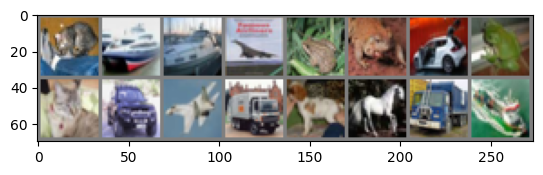

GroundTruth:    cat  ship  ship plane


In [52]:
# 適当な訓練セットの画像を取得
for data in testloader:
    images, labels = data
    break  # Only process one batch for demonstration

# 画像の表示
imshow(torchvision.utils.make_grid(images))

# ラベルの表示
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [53]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [54]:
outputs = net(images)

In [55]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [77]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 74 %


In [78]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 75 %
Accuracy of   car : 85 %
Accuracy of  bird : 64 %
Accuracy of   cat : 61 %
Accuracy of  deer : 58 %
Accuracy of   dog : 66 %
Accuracy of  frog : 81 %
Accuracy of horse : 81 %
Accuracy of  ship : 90 %
Accuracy of truck : 83 %
